In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")

In [3]:
user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")

eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")
ineq_user_dau = user_dau[~user_dau.user_id.isin(eq_user_dau['user_id'])]

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [4]:
user_street.tail()

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
117,118,Teo,8850,h,25,r6,NaN,r1,r2,r2,...,False,False,19,0,4,r1,r1,4,10,0
118,119,Eva Ruiz,8015,d,37,r6,NaN,NaN,NaN,NaN,...,False,False,19,0,5,NaN,NaN,16,10,1
119,120,Lobo,8003,h,44,r5,NaN,r1,r2,r2,...,False,False,19,0,3,r3,r3,0,10,0
120,121,Ale,8028,d,28,r6,NaN,r1,r3,r1,...,False,True,19,0,6,r2,r3,14,10,0
121,122,Ruth,8320,h,28,r5,NaN,r1,r2,r2,...,True,False,19,0,2,r2,r3,26,10,0


In [5]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [6]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [7]:
### Ronda 0: 
ronda_dau0 = pd.read_csv("dades/ronda_dau_0.csv", delimiter=',' , encoding="latin-1")
ronda_street0 = pd.read_csv("dades/ronda_street_0.csv", delimiter=',' , encoding="latin-1")
ronda_vil0 = pd.read_csv("dades/ronda_vil_0.csv", delimiter=',' , encoding="latin-1")

In [8]:
user_dau.loc[:, 'prfinal1'].unique()

array(['r1', 'r2', 'r3', nan], dtype=object)

In [9]:
daur = pd.read_csv("dades/dau_r.csv", delimiter=',' , encoding="latin-1")
streetr = pd.read_csv("dades/street_r.csv", delimiter=',' , encoding="latin-1")
vilr = pd.read_csv("dades/vil_r.csv", delimiter=',' , encoding="latin-1")

In [10]:
def dataset_2(ds_r,user_ds):
    table1 = ds_r[['user_id','partida_id','mean_contr']]
    table2 = user_ds[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                     'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13','prfinal14','prfinal15']]
    ds_2 = table1.merge(table2, on = 'user_id')
    ds_2['genere'] =ds_2['genere'].map({'d': 1, 'h': 0})
    ds_2['prfinal1'] =ds_2['prfinal1'].map({'r1': 1, 'r2': 2, 'r3':3, 'nan':0})
    ds_2['prfinal2'] =ds_2['prfinal2'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal3'] =ds_2['prfinal3'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal4'] =ds_2['prfinal4'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal5'] =ds_2['prfinal5'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal6'] =ds_2['prfinal6'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal7'] =ds_2['prfinal7'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal8'] =ds_2['prfinal8'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal9'] =ds_2['prfinal9'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal10'] =ds_2['prfinal10'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal11'] =ds_2['prfinal11'].map({'r1': 1, 'r4': 3, 'r3':2,'nan':0})
    ds_2['prfinal12'] =ds_2['prfinal12'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal13'] =ds_2['prfinal13'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal14'] =ds_2['prfinal14'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal15'] =ds_2['prfinal15'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    return(ds_2)

In [11]:
ds_2_dau = dataset_2(daur,user_dau)
ds_2_street = dataset_2(streetr,user_street)

In [12]:
user_vil.rename(columns={'enquesta_final_pr1': 'prfinal1', 'enquesta_final_pr2': 'prfinal2','enquesta_final_pr3': 'prfinal3',
                        'enquesta_final_pr4': 'prfinal4','enquesta_final_pr5': 'prfinal5','enquesta_final_pr6': 'prfinal6',
                        'enquesta_final_pr7': 'prfinal7','enquesta_final_pr8': 'prfinal8','enquesta_final_pr9': 'prfinal9',
                        'enquesta_final_pr10': 'prfinal10','enquesta_final_pr11': 'prfinal11','enquesta_final_pr12': 'prfinal12',
                        'enquesta_final_pr13': 'prfinal13',}, inplace=True)

In [13]:
user_vil

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,situacio_laboral,estat_civil,num_jugador,acabat,...,prfinal5,prfinal6,prfinal7,prfinal8,prfinal9,prfinal10,prfinal11,prfinal12,prfinal13,bots
0,1,Leo,8840,F,r6,r2,r1,r1,3.0,1,...,r2,r9,r7,r4,r2,r1,r2,r3,Mas plantas y que los nií±os tengan mas espaci...,0
1,2,Jaimito,8840,M,r6,r7,r1,r4,6.0,1,...,r1,na,r3,r5,r1,r1,r1,r1 r2 r3 r4,Todo zona peatonal\r\r,0
2,3,Hugo,8840,M,r7,r4,r1,r2,1.0,1,...,r2,r11,r2,r3,r1,r2,r1,r5,La mejora en la pavimentacion,0
3,4,Francisca,8840,F,r7,r2,r1,r5,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Lucia,8840,M,r4,r6,r3,r2,4.0,1,...,r1,na,r2,r2,r4,r4,r2,r1,Un parque mas grande zonas verdee,0
5,6,Luz,8840,M,r7,r7,r1,r2,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,Tere,8840,M,r4,r5,r3,r1,1.0,1,...,r2,r8,r5,r3,r5,r1,r3,r2 r5,\r\rFuemtes\r\r,0
7,8,Nunu,8719,M,r4,r6,r2,r4,4.0,1,...,r2,r9,r3,r2,r5,r4,r4,r5,Flors,0
8,9,Kime,8840,M,r6,r4,r3,r2,3.0,1,...,r1,na,r4,r3,r5,r2,r3,r6,ESpacio verde\r\r,0
9,10,Rosi,8840,M,r5,r3,r3,r2,6.0,1,...,r2,r6,r4,r2,r5,r4,r3,r2,Tiendas de ropa y accesorios para decorar,0


In [14]:
table1 = vilr[['user_id','partida_id','mean_contr']]
table2 = user_vil[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                 'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13']]
ds_2_vil = table1.merge(table2, on = 'user_id')

In [15]:
#create new df 
final_dau = pd.DataFrame({'ronda_obj':ronda_dau0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_dau0['partida_id'])})

final_street = pd.DataFrame({'ronda_obj':ronda_street0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_street0['partida_id'])})

final_vil = pd.DataFrame({'ronda_obj':ronda_vil0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_vil0['partida_id'])})
#print (df)

In [16]:
def ending_game(final_ds,contr_ds,user_ds,ending_pos,name_ds):
    final = final_ds[final_ds.ronda_obj==ending_pos]
    mean_contr_ds= contr_ds.mean(axis=0)
    #Plot
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 10)
    
    for i in final.partida_id.unique():
        game_contr = contr_ds.loc[list(user_ds[user_ds.partida_id==i].user_id),:]
        mean_contr_game = game_contr.describe().loc['mean',:]
        ax.plot(x, mean_contr_game, label=["Game:",i])

    ax.plot(x, mean_contr_ds,label=name_ds,c = 'black')
    ax.axvline(x=ending_pos, c = "black")
    plt.legend()

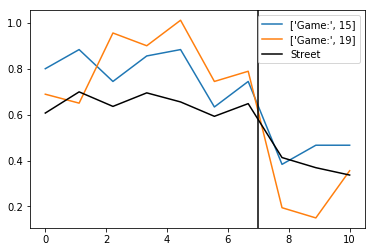

In [17]:
ending_game(final_street, contr_street_norm, user_street, 7,"Street")

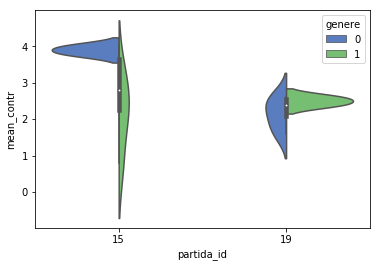

In [20]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==7]['partida_id']))])

In [21]:
##Analysis game 19: 
contr_game19 = contr_street.loc[user_street[user_street.partida_id==19]['user_id'],:]
contr_game19

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
117,4,2,4,2,2,2,0,0,0,0
118,2,2,2,2,4,4,4,2,0,4
119,2,4,4,4,4,4,2,0,0,0
120,2,2,4,4,4,0,4,0,0,0
121,2,2,4,4,4,4,2,2,2,0
122,4,2,2,2,2,4,2,0,2,4


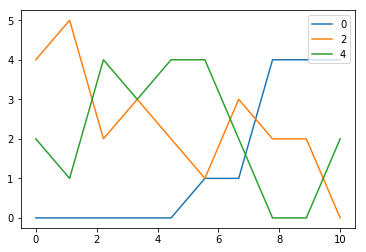

In [22]:
# STREET game 19:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, contr_game19[contr_game19 == 0].count(),label="0")
ax.plot(x, contr_game19[contr_game19 == 2].count(),label="2")
ax.plot(x, contr_game19[contr_game19 == 4].count(),label="4")
plt.legend()

In [23]:
user_street[user_street.partida_id==15]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
86,87,Yoconozco@yahoo.es,8012,h,43,r6,NaN,r1,r1,r1,...,False,False,15,0,5,r1,r4,10,10,0
87,88,Mayesta,8003,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,2,r1,r4,6,10,0
88,89,Yo,2001,d,36,r6,NaN,r1,r2,r2,...,True,True,15,0,3,r1,r3,12,9,0
89,90,Jose,8001,h,31,r6,NaN,r1,r1,r2,...,False,False,15,0,1,r1,r4,2,10,0
90,91,PICADILLO,8010,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,6,r3,r4,38,10,1
91,92,Jess,13055,d,32,r6,NaN,r1,r3,r2,...,False,False,15,0,4,r1,r3,8,10,0


In game 19 we have that 2/3 of participants are males and 1/3 females.

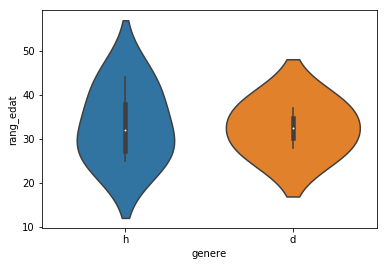

In [24]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==19],
               order=["h", "d"])
plt.show()

In [25]:
##Analysis game 15: 
contr_game15 = contr_street.loc[user_street[user_street.partida_id==15]['user_id'],:]
contr_game15

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
87,4,4,4,4,4,4,4,4,4,4
88,4,4,4,2,4,2,4,0,0,0
89,2,2,0,2,2,0,0,0,0,0
90,2,4,4,4,4,4,4,4,4,4
91,4,4,2,4,4,2,2,0,0,0
92,2,2,4,4,2,4,4,2,4,4


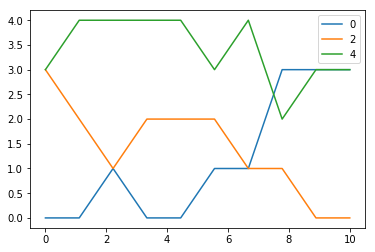

In [26]:
# STREET game 15:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, contr_game15[contr_game15 == 0].count(),label="0")
ax.plot(x, contr_game15[contr_game15 == 2].count(),label="2")
ax.plot(x, contr_game15[contr_game15 == 4].count(),label="4")
plt.legend()

In [181]:
user_street[user_street.partida_id==15]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
86,87,Yoconozco@yahoo.es,8012,h,43,r6,NaN,r1,r1,r1,...,False,False,15,0,5,r1,r4,10,10,0
87,88,Mayesta,8003,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,2,r1,r4,6,10,0
88,89,Yo,2001,d,36,r6,NaN,r1,r2,r2,...,True,True,15,0,3,r1,r3,12,9,0
89,90,Jose,8001,h,31,r6,NaN,r1,r1,r2,...,False,False,15,0,1,r1,r4,2,10,0
90,91,PICADILLO,8010,d,41,r6,NaN,r1,r1,r2,...,False,False,15,0,6,r3,r4,38,10,1
91,92,Jess,13055,d,32,r6,NaN,r1,r3,r2,...,False,False,15,0,4,r1,r3,8,10,0


In game 19 we have that 2/3 of participants are males and 1/3 females.

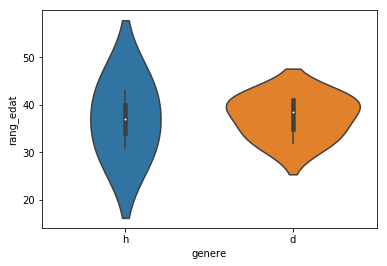

In [182]:
ax = sns.violinplot(x="genere", y="rang_edat", data=user_street[user_street.partida_id==15],
               order=["h", "d"])
plt.show()

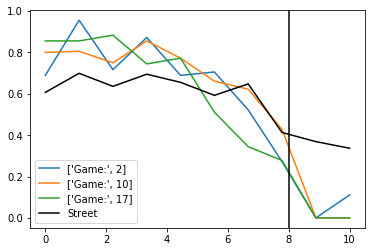

In [183]:
ending_game(final_street, contr_street_norm, user_street, 8,"Street")

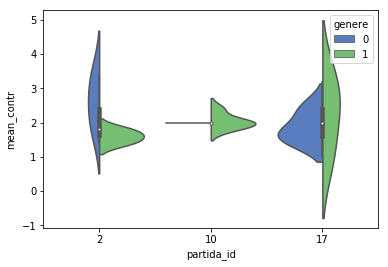

In [184]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==8]['partida_id']))])


In [185]:
## Game 10 - ending at round 8
user_street[user_street.partida_id==10]

,user_id,nickname,codi_postal,genere,rang_edat,nivell_estudis,prfinal0,prfinal1,prfinal2,prfinal3,...,check_2,check_3,partida_id,is_robot,num_jugador,prfinal14,prfinal15,guany_final,num_seleccions,sorteig
55,56,Ant,8006,d,17,r3,NaN,r1,r2,r2,...,False,True,10,0,4,r1,r4,20,10,0
56,57,Maria,8006,d,17,r4,NaN,r1,r2,r2,...,True,True,10,0,5,r1,r3,22,10,0
57,58,Irina,8006,d,17,r3,NaN,r1,r2,r2,...,False,False,10,0,1,r2,r2,10,10,0
58,59,Paloma,8034,d,44,r4,NaN,r1,r2,r4,...,True,False,10,0,2,r1,r2,0,10,0
59,60,Monica,8023,d,20,r4,NaN,r1,r1,r2,...,False,False,10,0,3,r1,r1,36,10,1
60,61,Pau,8840,h,26,r7,NaN,r1,r1,r1,...,False,True,10,0,6,r3,r2,30,10,0


In [186]:
##Analysis game 10: 
contr_game10 = contr_street.loc[user_street[user_street.partida_id==10]['user_id'],:]
contr_game10

ronda_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
56,2,4,2,4,4,0,4,0,0,0
57,2,2,4,4,2,2,0,2,0,0
58,2,4,4,2,2,4,2,0,0,0
59,4,4,2,2,2,2,2,2,0,0
60,2,0,4,4,4,2,4,4,0,0
61,4,0,0,4,4,4,2,2,0,0


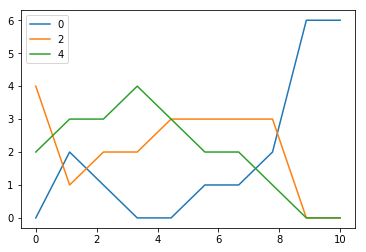

In [187]:
# STREET game 15:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 10)
ax.plot(x, contr_game10[contr_game10 == 0].count(),label="0")
ax.plot(x, contr_game10[contr_game10 == 2].count(),label="2")
ax.plot(x, contr_game10[contr_game10 == 4].count(),label="4")
plt.legend()

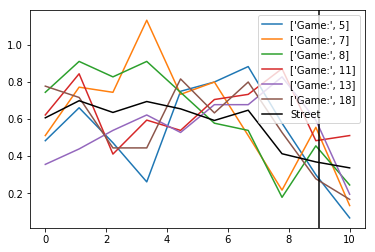

In [188]:
ending_game(final_street, contr_street_norm, user_street, 9,"Street")

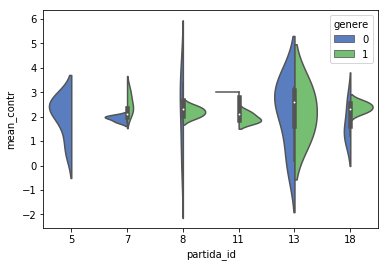

In [189]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==9]['partida_id']))])


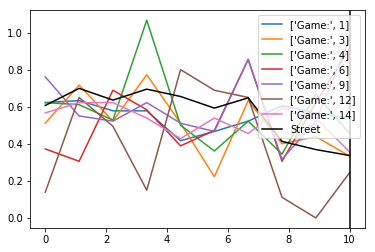

In [190]:
ending_game(final_street, contr_street_norm, user_street, 10,"Street")

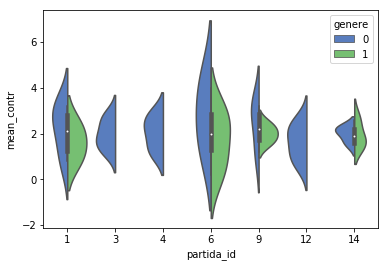

In [191]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_street.loc[ds_2_street.partida_id.isin(list(final_street[final_street.ronda_obj==10]['partida_id']))])


### VIL:

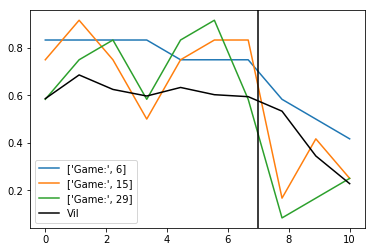

In [192]:
ending_game(final_vil, contr_vil_norm, user_vil, 7,"Vil")

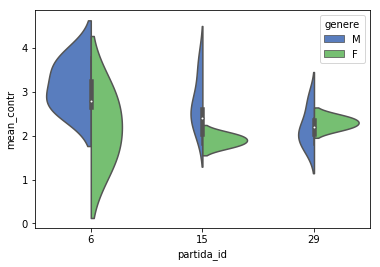

In [193]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==7]['partida_id']))])


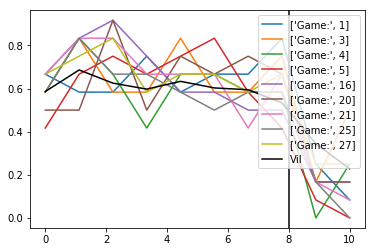

In [80]:
ending_game(final_vil, contr_vil_norm, user_vil, 8,"Vil")

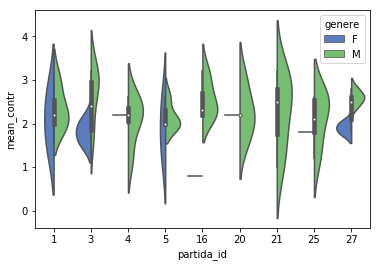

In [194]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==8]['partida_id']))])


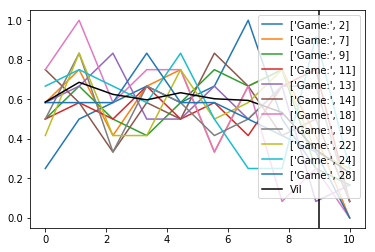

In [195]:
ending_game(final_vil, contr_vil_norm, user_vil, 9,"Vil")

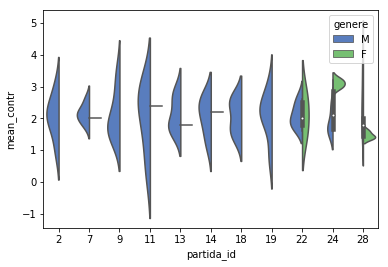

In [196]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==9]['partida_id']))])


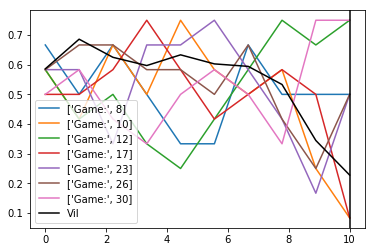

In [197]:
ending_game(final_vil, contr_vil_norm, user_vil, 10,"Vil")

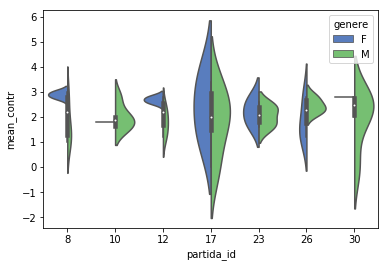

In [198]:
ax = sns.violinplot(x="partida_id", y="mean_contr", hue="genere", 
                 palette="muted", split=True, data=ds_2_vil.loc[ds_2_vil.partida_id.isin(list(final_vil[final_vil.ronda_obj==10]['partida_id']))])


In [49]:
## STREET case: 
## How many games finish at round 7?
final7 = final_street[final_street.ronda_obj==7]
final7

,partida_id,ronda_obj
partida_id,,
15,15,7
19,19,7


In [54]:
## Game ending at round 7
game15_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==15].user_id),:]
game19_contr_s = contr_street_norm.loc[list(user_street[user_street.partida_id==19].user_id),:]

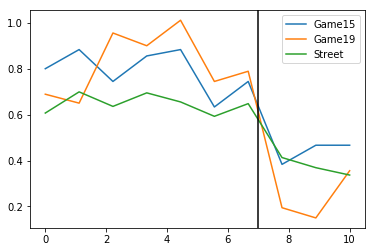

In [58]:
# Mean contribution per round
mean_contr_game15_s = game15_contr_s.describe().loc['mean',:]
mean_contr_game19_s = game19_contr_s.describe().loc['mean',:]
mean_contr_street= contr_street_norm.mean(axis=0)

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game15_s,label="Game15")
ax.plot(x, mean_contr_game19_s,label="Game19")
ax.plot(x, mean_contr_street,label="Street")
ax.axvline(x=7, c = "black")
plt.legend()

In [59]:
## How many games finish at round 7?
final8 = final_street[final_street.ronda_obj==8]
final8

,partida_id,ronda_obj
partida_id,,
2,2,8
10,10,8
17,17,8


In [39]:
## DAU case: 
## How many games finish at round 6?
final6 = final_dau[final_dau.ronda_obj==6]
## Game 2 is heterogeneous

## How many games finish at round 7?
final7 = final_dau[final_dau.ronda_obj==7]
## Games 3 and 12 are heterogeneous
## Games 23, 25 and 30 are heterogeneous

In [35]:
## How many games finish at round 8?
final8 = final_dau[final_dau.ronda_obj==8]
final8.shape

(15, 2)

In [36]:
## How many games finish at round 9?
final9 = final_dau[final_dau.ronda_obj==9]
final9.shape

(14, 2)

In [37]:
## How many games finish at round 10?
final10 = final_dau[final_dau.ronda_obj==10]
final10.shape

(19, 2)

In [38]:
### Partida 2 end the game in 6 rounds. Which users
final7.partida_id.unique

<bound method Series.unique of partida_id
3      3
12    12
23    23
25    25
30    30
Name: partida_id, dtype: int64>

In [50]:
list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id)

[5, 9, 10, 11, 12, 14]

In [77]:
## Game ending at round 6
game2_contr = ineq_contr_dau_norm.loc[list(ineq_user_dau[ineq_user_dau.partida_id==2].user_id),:]*10
game2_contr.describe().loc['mean',:]

ronda_id
1     0.841667
2     1.050000
3     0.952778
4     1.077778
5     0.786111
6     0.655556
7     0.525000
8     0.461111
9     0.816667
10    0.416667
Name: mean, dtype: float64

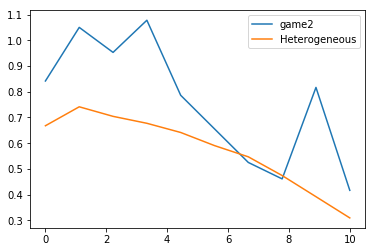

In [80]:
# Mean contribution per round
mean_contr_game2 = game2_contr.describe().loc['mean',:]
mean_contr_ineq= ineq_contr_dau_norm.mean(axis=0)*10

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 10)
ax.plot(x, mean_contr_game2,label="game2")
ax.plot(x, mean_contr_ineq,label="Heterogeneous")

plt.legend()

### Socio-demographic exploration: 

In [14]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

In [20]:
### PCA: 
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = ds_2_dau.iloc[:,-15:].fillna(0)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef


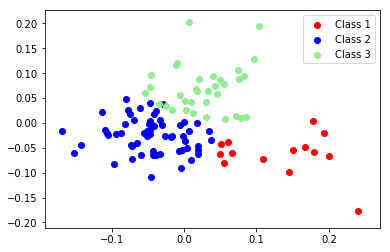

In [21]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

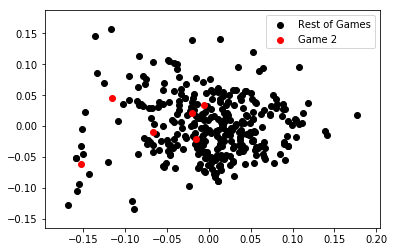

In [64]:
### Pintar jugadores por partida
X = contr_dau_norm
y = ds_2_dau.loc[:,"partida"]

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

plt.scatter(transformed[y!=2][0], transformed[y!=2][1], label='Rest of Games', c='black')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Game 2', c='red')

plt.legend()
plt.show()

In [22]:
### Pintar jugadores por partida
X = contr_dau_norm
y = ds_2_dau.loc[:,"partida"]

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

plt.scatter(transformed[y!=3 or y!=12 or y!=23 or y!=25 or y!=30][0], 
            transformed[y!=3 or y!=12 or y!=23 or y!=25 or y!=30][1], 
            label='Rest of Games', c='black')

plt.scatter(transformed[y==3 or y==12 or y==23 or y==25 or y==30][0], 
            transformed[y==3 or y==12 or y==23 or y==25 or y==30][1], 
            label='Game ending at 7', c='red')

plt.legend()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
clust1 = X.iloc[y == 0]
clust2 = X.iloc[y == 1]
clust3 = X.iloc[y == 2]

users_clust1 = list(clust1.index)
users_clust2 = list(clust2.index)
users_clust3 = list(clust3.index)

#user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user.csv", delimiter=',' , encoding="latin-1")
#user_street.drop(user_street.index[3], inplace=True)
din_in_clust1 = user_street[user_street['user_id'].isin(users_clust1)]['diners_inicials']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']



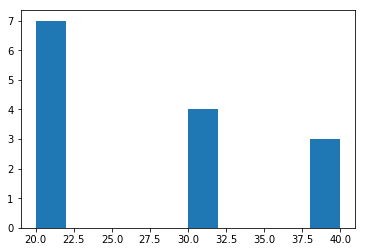

In [24]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(1, len(din_in_clust1), len(din_in_clust1))
#ax.set_title('Huber function')
#ax.set_xlabel('$u$')
#ax.set_ylabel(r'$\rho(u)$')
y = din_in_clust1
#plt.scatter(x, y, c="r")
plt.hist(y)
#plt.axhline(c="g")
#plt.axvline(c="g")
plt.show()

In [ ]:
din_in_clust1 = ds_2_street[user_street['user_id'].isin(users_clust1)]['genere']
din_in_clust2 = user_street[user_street['user_id'].isin(users_clust2)]['diners_inicials']
din_in_clust3 = user_street[user_street['user_id'].isin(users_clust3)]['diners_inicials']